## SVM Exercise

In [1]:
# import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle

# Data processing, metrics and modeling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix, accuracy_score


Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


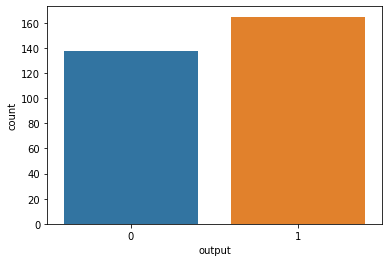

In [4]:
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(data['output'])
plt.show()

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace = True)

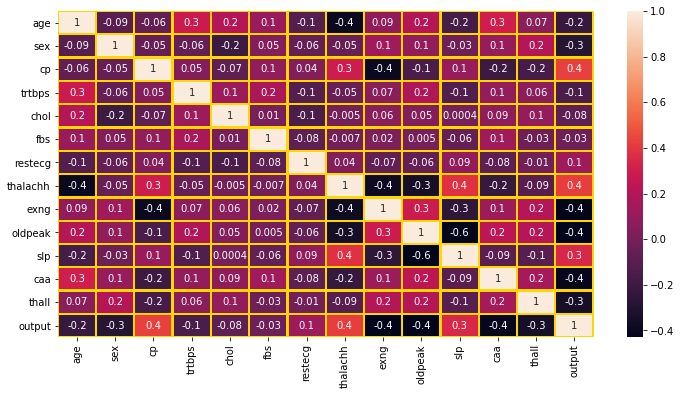

In [8]:
plt.figure(figsize =(12,6))
sns.heatmap(data.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor='gold',annot=True);

* create X, y

In [9]:
X = data.drop(["output"],axis = 1)
y = data.output

In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

* import train_test_split and split data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [12]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* import SVC from sklearn and use Polynomial kernel

In [13]:
clf = svm.SVC(kernel="poly")

* fit training data

In [14]:
clf.fit(X_train,y_train)

SVC(kernel='poly')

* predict X_test

In [15]:
y_predict = clf.predict(X_test)

In [129]:
y_predict

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [16]:
print("Accuracy for Polynomial kernel:",metrics.accuracy_score(y_test,y_predict)*100,"%")

Accuracy for Polynomial kernel: 81.9672131147541 %


* import confusion matrix from sklearn and print values

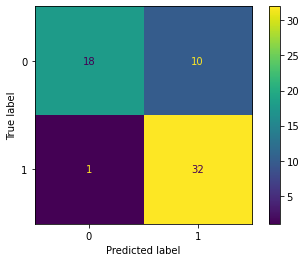

In [17]:
plot_confusion_matrix(clf,X_test,y_test)

* create SVC with rbf kernel

In [18]:
clf1 = svm.SVC(kernel="rbf")

* fit training data

In [19]:
clf1.fit(X_train,y_train)

SVC()

* predict X_test

In [20]:
y_predict1 = clf1.predict(X_test)

In [21]:
print("Accuracy for rbf kernel:",metrics.accuracy_score(y_test,y_predict1)*100,"%")

Accuracy for rbf kernel: 83.60655737704919 %


* print confusion matrix

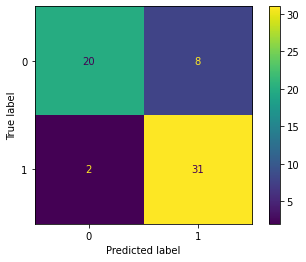

In [22]:
plot_confusion_matrix(clf1,X_test,y_test)

* create SVC with sigmoid kernel

In [23]:
clf2 = svm.SVC(kernel="linear")

* fit training data

In [24]:
clf2.fit(X_train,y_train)

SVC(kernel='linear')

* predict X_test

In [25]:
y_predict2 = clf2.predict(X_test)

In [26]:
print("Accuracy for SVM linear kernel:",metrics.accuracy_score(y_test,y_predict2)*100,"%")

Accuracy for SVM linear kernel: 80.32786885245902 %


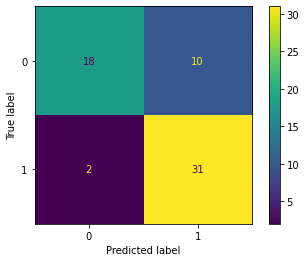

In [27]:
plot_confusion_matrix(clf2,X_test,y_test)

In [144]:
model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [145]:
y_predict4 = model_2.predict(X_test)

In [146]:
print("Accuracy for :",metrics.accuracy_score(y_test,y_predict4)*100,"%")

Accuracy for : 78.68852459016394 %


The accuracy of Logistic Regression is :  78.68852459016394 %


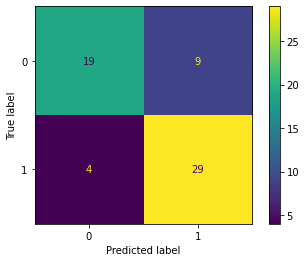

In [147]:
model3 = LogisticRegression(solver='newton-cg')
model3.fit(X_train, y_train)
predicted5=model3.predict(X_test)
conf = plot_confusion_matrix(model3, X_test, y_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted5)*100, "%")

In [28]:
# Data enhancement based on gender with best features
def enhancement(data):
    gen_data =data
    for sex in data['sex'].unique():
        gender_data = gen_data[gen_data['sex']==sex]

        thalachh_std = gender_data['thalachh'].std()/10
        oldpeak_std = gender_data['oldpeak'].std()/10
        caa_std = gender_data['caa'].std()/10
        cp_std =gender_data['cp'].std()/10

        for i in gen_data[gen_data['sex']==sex].index-1:
            if np.random.randint(2) == 1:
                gen_data['thalachh'].values[i] += thalachh_std
            else:
                gen_data['thalachh'].values[i] -= thalachh_std

            if np.random.randint(2) == 1:
                gen_data['oldpeak'].values[i] += oldpeak_std
            else:
                gen_data['oldpeak'].values[i] -= oldpeak_std

            if np.random.randint(2) == 1:
                gen_data['caa'].values[i] += caa_std
            else:
                gen_data['caa'].values[i] -= caa_std

            if np.random.randint(2) == 1:
                gen_data['cp'].values[i] += cp_std
            else:
                gen_data['cp'].values[i] -= cp_std

    return gen_data
gen = enhancement(data)

In [29]:
gen

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,152,0,2.417490,0,0,1,1
1,37,1,1,130,250,0,1,185,0,3.387258,0,0,2,1
2,41,0,0,130,204,0,0,169,0,1.517490,2,0,2,1
3,56,1,0,120,236,0,1,176,0,0.912742,2,0,2,1
4,57,0,0,120,354,0,1,165,1,0.482510,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,124,1,0.087258,1,0,3,0
299,45,1,3,110,264,0,1,134,0,1.317490,1,0,3,0
300,68,1,0,144,193,1,1,143,0,3.282510,1,2,3,0
301,57,1,0,130,131,0,1,112,1,1.317490,1,1,3,0


In [30]:
frames = [data,gen]
new_data = pd.concat(frames)
new_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,152,0,2.417490,0,0,1,1
1,37,1,1,130,250,0,1,185,0,3.387258,0,0,2,1
2,41,0,0,130,204,0,0,169,0,1.517490,2,0,2,1
3,56,1,0,120,236,0,1,176,0,0.912742,2,0,2,1
4,57,0,0,120,354,0,1,165,1,0.482510,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,124,1,0.087258,1,0,3,0
299,45,1,3,110,264,0,1,134,0,1.317490,1,0,3,0
300,68,1,0,144,193,1,1,143,0,3.282510,1,2,3,0
301,57,1,0,130,131,0,1,112,1,1.317490,1,1,3,0


In [31]:
X = new_data.drop(["output"],axis = 1)
y = new_data.output

In [32]:
X.shape

(604, 13)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [88]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The accuracy of new_data linear is :  88.42975206611571 %


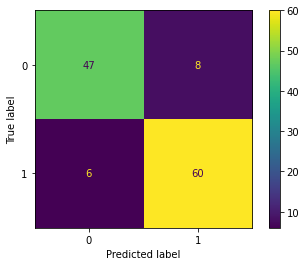

In [89]:
clf6 = svm.SVC(kernel="poly")
clf6.fit(X_train,y_train)
y_predict6 = clf6.predict(X_test)
conf = plot_confusion_matrix(clf6, X_test, y_test)
print ("The accuracy of new_data linear is : ", accuracy_score(y_test, y_predict6)*100, "%")

The accuracy of new_data linear is :  98.34710743801654 %


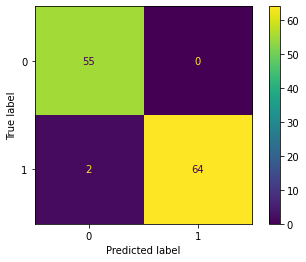

In [104]:
model_7 = RandomForestClassifier(random_state=42)
model_7.fit(X_train,y_train)
y_predict7 = model_7.predict(X_test)
conf = plot_confusion_matrix(model_7, X_test, y_test)
print ("The accuracy of new_data linear is : ", accuracy_score(y_test, y_predict7)*100, "%")

In [85]:
x_train, x_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [86]:
from imblearn.over_sampling import SMOTENC
cat_indx = [1,2,5,6,8,10,11,12]
sm = SMOTENC(Categorical_features = cat_indx, random_state = 0)
X_train_res,y_train_res = sm.fit_resample(x_train,Y_train)


TypeError: __init__() got an unexpected keyword argument 'Categorical_features'

In [90]:
from imblearn.over_sampling import SMOTENC
cat_indx = [5]
sm = SMOTENC(Categorical_features = cat_indx, random_state = 0)
X_train_res,y_train_res = sm.fit_resample(x_train,Y_train)


TypeError: __init__() got an unexpected keyword argument 'Categorical_features'

In [43]:
sklearn.__version__

NameError: name 'sklearn' is not defined